Using TF 1.14 and Keras 2.2.4 - there are warnings but TF 2+ is difficult with Windows :/

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
C:\Users\Chloe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Chloe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Chloe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Chloe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data = pd.read_csv('utterance-data-with-labels-binary.csv')

In [3]:
data.head()

,ObsID,UtteranceID,TeacherID,TranscribedUtterance,IsQuestion,IsInstructionalUtterance,IsInstructionalStatement,IsDisciplinaryUtterance,IsDisciplinaryStatement,IsEvaluationFollowupIncluded,...,CombinedAuthCogUptake,CogLevel,Uptake,IsGoalSpecified,IsDisciplinaryTermsPresent,IsInstructionalQuestion,IsDisciplinaryQuestion,IsStudentResponsePresent,Authenticity,IsSerialQuestion
0,sch01_tch01_03_19_18_period03,1,sch01_tch01,oh you mean the,1,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,sch01_tch01_03_19_18_period03,101,sch01_tch01,thank you somebody,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,sch01_tch01_03_19_18_period03,102,sch01_tch01,so I'll need some some help reading it,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,sch01_tch01_03_19_18_period03,103,sch01_tch01,you will have died from walking across the str...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sch01_tch01_03_19_18_period03,104,sch01_tch01,get a very good soil goes into like that aware...,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
utterances = data['TranscribedUtterance']

**Variables to include:** 'IsInstructionalUtterance', 'IsQuestion', 'Authenticity', 'IsEvaluationElaborated', 'CogLevel', 'IsGoalSpecified', 'IsDisciplinaryTermsPresent'

In [5]:
data = data.drop(['IsInstructionalStatement','IsDisciplinaryUtterance','IsDisciplinaryStatement','IsEvaluationFollowupIncluded','IsEvaluationValencePositive','CombinedAuthCogUptake','Uptake','IsInstructionalQuestion', 'IsDisciplinaryQuestion','IsStudentResponsePresent','IsSerialQuestion'], axis=1)

In [6]:
data.columns

Index(['ObsID', 'UtteranceID', 'TeacherID', 'TranscribedUtterance',
       'IsQuestion', 'IsInstructionalUtterance', 'IsEvaluationElaborated',
       'CogLevel', 'IsGoalSpecified', 'IsDisciplinaryTermsPresent',
       'Authenticity'],
      dtype='object')

In [7]:
respList = np.array([list(data.iloc[0,4:])])
for i in range(1,len(data)):
    respList = np.append(respList, [list(data.iloc[i,4:])], axis=0)
print(respList.shape)

(16977, 7)


In [8]:
docs = list(utterances.values)

In [9]:
# tokenize
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the sequences
encoded_docs = t.texts_to_sequences(docs)

(array([1.5543e+04, 9.5300e+02, 2.7300e+02, 1.0100e+02, 5.4000e+01,
        2.2000e+01, 7.0000e+00, 5.0000e+00, 4.0000e+00, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000e+00, 5.700e+01, 1.130e+02, 1.690e+02, 2.250e+02, 2.810e+02,
        3.370e+02, 3.930e+02, 4.490e+02, 5.050e+02, 5.610e+02, 6.170e+02,
        6.730e+02, 7.290e+02, 7.850e+02, 8.410e+02, 8.970e+02, 9.530e+02,
        1.009e+03, 1.065e+03, 1.121e+03, 1.177e+03, 1.233e+03, 1.289e+03,
        1.345e+03, 1.401e+03, 1.457e+03, 1.513e+03, 1.569e+03, 1.625e+03,
        1.681e+03, 1.737e+03, 1.793e+03, 1.849e+03, 1.905e+03, 1.961e+03,
        2.

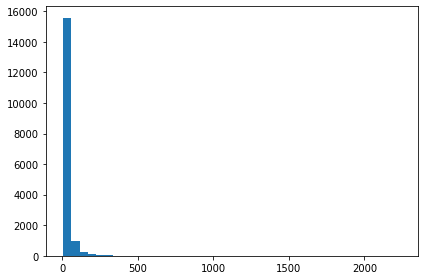

In [10]:
# find longest utterance
utterance_lengths = []
for i in range(len(encoded_docs)):
    utterance_lengths.append(len(encoded_docs[i]))

# histogram of utterance length
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.hist(utterance_lengths, bins=40)

In [11]:
# pad documents to max length
padded_docs_init = pad_sequences(encoded_docs, maxlen=max(utterance_lengths), padding='post')
# trim to 100 words
padded_docs = pad_sequences(padded_docs_init, maxlen=100, truncating='post')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, respList, test_size=0.2, random_state=45)
print(X_train.shape, 'train sequences')
print(X_test.shape, 'test sequences')

(13581, 100) train sequences
(3396, 100) test sequences


In [13]:
#build model
max_features = 50000

model = Sequential()
model.add(Embedding(max_features, 64, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           3200000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 231       
Total para

In [15]:
#train model
batchsz = 4
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batchsz, epochs=20, validation_data=(X_test, y_test), shuffle=True)
score, acc = model.evaluate(X_test, y_test,batch_size=batchsz)
print('Test score:', score)
print('Test accuracy:', acc)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...
Train on 13581 samples, validate on 3396 samples
Epoch 1/20
13581/13581 [==============================] - 1029s 76ms/step - loss: 0.3340 - acc: 0.8799 - val_loss: 0.3193 - val_acc: 0.8856
Epoch 2/20
13581/13581 [==============================] - 1019s 75ms/step - loss: 0.3216 - acc: 0.8810 - val_loss: 0.3038 - val_acc: 0.8856
Epoch 3/20
13581/13581 [==============================] - 1009s 74ms/step - loss: 0.3118 - acc: 0.8810 - val_loss: 0.2981 - val_acc: 0.8856
Epoch 4/20
13581/13581 [==============================] - 1016s 75ms/step - loss: 0.3094 - acc: 0.8810 - val_loss: 0.2968 - val_acc: 0.8856
Epoch 5/20
13581/13581 [==============================] - 1022s 75ms/step - loss: 0.3061 - acc: 0.8810 - val_loss: 0.2964 - val_acc: 0.8856
Epoch 6/20
13581/13581 [==============================] - 1028s 76ms/step - loss: 0.3057 - acc: 0.8810 - val_loss: 0.2988 - val_acc: 0.8856
Epoch 

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred, multi_class='ovr') #change to 'ovo'
print(auc)

0.6493408468565836


In [36]:
print('IsQuestion  acc: ',1-sum(abs(y_test[:,0] - y_pred[:,0]))/len(y_test),' roc: ', roc_auc_score(y_test[:,0], y_pred[:,0]))
print('IsInstructionalUtterance  acc: ',1-sum(abs(y_test[:,1] - y_pred[:,1]))/len(y_test),' roc: ', roc_auc_score(y_test[:,1], y_pred[:,1]))
print('IsEvaluationElaborated  acc: ',1-sum(abs(y_test[:,2] - y_pred[:,2]))/len(y_test),' roc: ', roc_auc_score(y_test[:,2], y_pred[:,2]))
print('CogLevel  acc: ',1-sum(abs(y_test[:,3] - y_pred[:,3]))/len(y_test),' roc: ', roc_auc_score(y_test[:,3], y_pred[:,3]))
print('IsGoalSpecified  acc: ',1-sum(abs(y_test[:,4] - y_pred[:,4]))/len(y_test),' roc: ', roc_auc_score(y_test[:,4], y_pred[:,4]))
print('IsDisciplinaryTermsPresent  acc: ',1-sum(abs(y_test[:,5] - y_pred[:,5]))/len(y_test),' roc: ', roc_auc_score(y_test[:,5], y_pred[:,5]))
print('Authenticity acc: ',1-sum(abs(y_test[:,6] - y_pred[:,6]))/len(y_test),' roc: ', roc_auc_score(y_test[:,6], y_pred[:,6]))

IsQuestion  acc:  0.5769982027993465  roc:  0.5432855881267196
IsInstructionalUtterance  acc:  0.7266109760574233  roc:  0.6096532612610469
IsEvaluationElaborated  acc:  0.8670412039360113  roc:  0.6238970255613329
CogLevel  acc:  0.9332272699640272  roc:  0.7149314003784808
IsGoalSpecified  acc:  0.8369712679349632  roc:  0.774821772418852
IsDisciplinaryTermsPresent  acc:  0.8242710757346822  roc:  0.7337885935955375
Authenticity acc:  0.9063522678452189  roc:  0.5450082866541153
